# Convolutional Neural Net with Word Embeddings
Adapted from code at https://keras.io/zh/examples/imdb_cnn/

This example demonstrates the use of Conv1D for text classification.<br/>
Gets to 0.88 test accuracy after 4 epochs.

# CNN
Convolutions are sliding window functions applied to a matrix that achieve specific results (e. g., image blur, edge detection.) The sliding window is called a kernel, filter, or feature detector. The visualization shows six 3×3 kernels that multiply their values element-wise with the original matrix, then sum them up. To get the full convolution, we do this for each element by sliding the filter over the entire matrix:

![CNN](https://thumbs.gfycat.com/PlasticMenacingDegu-size_restricted.gif) 

## Import modules

In [1]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


### Set parameters

In [2]:
max_words = 5000 # vocabulary size
maxlen = 200     # max sentense length
batch_size = 32
embedding_dims = 150
filters = 128    # the number of output filters in the convolution
kernel_size = 3  # width of the 1D convolution window
hidden_dims = 250
epochs = 4

## Loading data
We use the IMDB reviews dataset.

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


### Pad sequences
Pad sequences to (samples x length)

In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 200)
x_test shape: (25000, 200)


Show one sentence

In [5]:
x_train[0]

array([   5,   25,  100,   43,  838,  112,   50,  670,    2,    9,   35,
        480,  284,    5,  150,    4,  172,  112,  167,    2,  336,  385,
         39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,    4,
        192,   50,   16,    6,  147, 2025,   19,   14,   22,    4, 1920,
       4613,  469,    4,   22,   71,   87,   12,   16,   43,  530,   38,
         76,   15,   13, 1247,    4,   22,   17,  515,   17,   12,   16,
        626,   18,    2,    5,   62,  386,   12,    8,  316,    8,  106,
          5,    4, 2223,    2,   16,  480,   66, 3785,   33,    4,  130,
         12,   16,   38,  619,    5,   25,  124,   51,   36,  135,   48,
         25, 1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,
         14,  407,   16,   82,    2,    8,    4,  107,  117,    2,   15,
        256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,
        476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,
         88,    4,  381,   15,  297,   98,   32, 20

## Defining the network

In [6]:
model = Sequential()

We start off with an efficient embedding layer which maps
our vocab indices into embedding_dims dimensions

In [7]:
model.add(Embedding(max_words,
                    embedding_dims,
                    input_length=maxlen))

model.add(Dropout(0.2))

We add a `Conv1D`, which will learn word group filters of size `kernel_size`:

In [8]:
model.add(Conv1D(filters,           # output size
                 kernel_size,       # width of convolution window
                 padding='valid',   # "valid" means "no padding"
                 activation='relu', # Rectified Linear Unit
                 strides=1))        # consecutive, no gaps

We use max pooling:

In [9]:
model.add(GlobalMaxPooling1D())

We add a vanilla hidden layer:

In [10]:
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.2))

We project onto a single unit output layer, and squash it with a sigmoid:

In [11]:
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Show the model

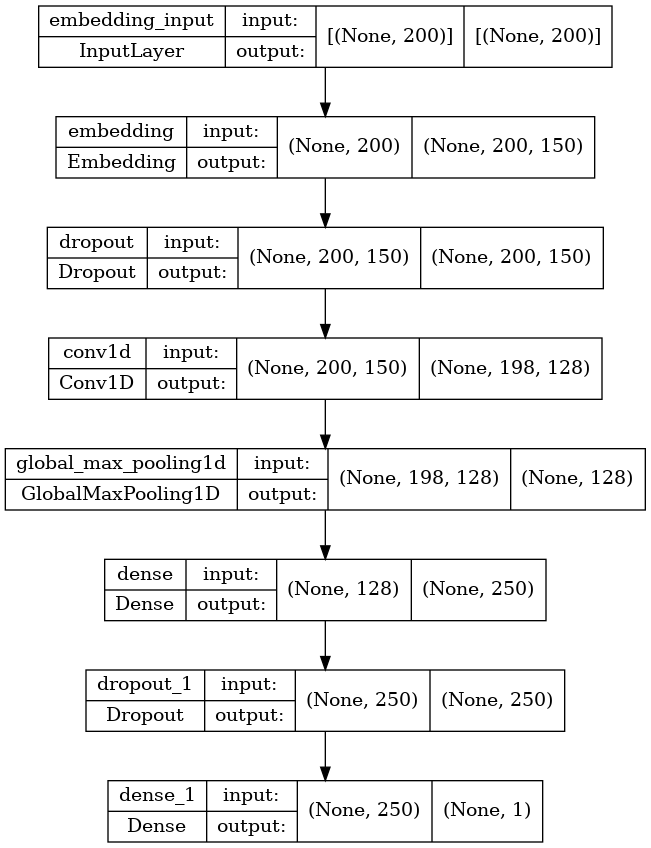

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

## Training
Save a random 10% of thre training set for validation.

In [13]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.1)

Epoch 1/4
704/704 [==============================] - 22s 30ms/step - loss: 0.4026 - accuracy: 0.8061 - val_loss: 0.3055 - val_accuracy: 0.8692
Epoch 2/4
704/704 [==============================] - 21s 30ms/step - loss: 0.2152 - accuracy: 0.9136 - val_loss: 0.2807 - val_accuracy: 0.8848
Epoch 3/4
704/704 [==============================] - 21s 30ms/step - loss: 0.1158 - accuracy: 0.9573 - val_loss: 0.3391 - val_accuracy: 0.8752
Epoch 4/4
704/704 [==============================] - 21s 29ms/step - loss: 0.0568 - accuracy: 0.9800 - val_loss: 0.3747 - val_accuracy: 0.8764


## Testing
Let's see how well the model performs on the test set.

In [14]:
predictions = model.predict(x_test)

In [15]:
predictions

array([[0.1569742 ],
       [0.9999448 ],
       [0.9906777 ],
       ...,
       [0.01885927],
       [0.01313275],
       [0.6956037 ]], dtype=float32)

In [16]:
predictions.round()

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [17]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

In [18]:
import numpy as np
errors = y_test-predictions.round().flatten()
errors

array([ 0.,  0.,  0., ...,  0.,  0., -1.])

In [19]:
len(errors[errors==0])

21995

In [20]:
len(errors[errors==0])/len(errors)

0.8798

## Evaluate the results

In [21]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print(f"Testing Accuracy: {accuracy*100:.2f}%")

Testing Accuracy: 87.98%


## Exploring the embeddings

In [22]:
model.layers

In [23]:
embeddings = model.get_weights()[0]
embeddings.shape

(5000, 150)

In [24]:
embeddings[0]

array([-0.00172266,  0.0058812 ,  0.00249656, -0.01416888, -0.04254358,
       -0.00077809, -0.02364106, -0.05085636,  0.01632917,  0.01719029,
       -0.00530397,  0.00570465,  0.05300032, -0.0068776 ,  0.00701067,
       -0.00468407, -0.01011212, -0.02529679, -0.04821425, -0.04240458,
       -0.05604127, -0.02604211,  0.0170639 ,  0.03384447,  0.02035432,
       -0.00310173,  0.01682653, -0.02304994, -0.02097409,  0.07484032,
        0.02204266,  0.0010095 , -0.01002811,  0.02536379,  0.0412717 ,
        0.01530192, -0.0057331 ,  0.01520378,  0.00223353,  0.02901486,
        0.0304919 ,  0.00933202,  0.0252702 ,  0.04417897,  0.03740019,
       -0.02366339, -0.01668518, -0.00086635, -0.02368007,  0.01256272,
        0.02028737,  0.0004433 , -0.02499999,  0.08026774, -0.00402309,
       -0.01336532, -0.03442255, -0.00110127,  0.0261378 , -0.02673218,
        0.03162981,  0.01593048,  0.02002789, -0.01363509,  0.02167602,
        0.00494641, -0.0190607 , -0.01770924,  0.03882227,  0.01

In [25]:
embeddings[2].dot(embeddings[4])

0.13274252

## Comparison with one-hot representations

In [26]:
model_one_hot = Sequential()

This is NOT a real embedding layer, it is just a trick 
to convert words into one-hot representations.

Note that the embeddinfs are not trained, thet never changes during training.

In [27]:
model_one_hot.add(Embedding(max_words,
                    max_words,
                    embeddings_initializer='identity',
                    input_length=maxlen,
                    trainable=False))  # do not train the embeddings

model_one_hot.add(Dropout(0.2))

We add a `Conv1D`, which will learn word group filters of size kernel_size:

In [28]:
model_one_hot.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))

We use max pooling:

In [29]:
model_one_hot.add(GlobalMaxPooling1D())

We add a vanilla hidden layer:

In [30]:
model_one_hot.add(Dense(hidden_dims, activation='relu'))
model_one_hot.add(Dropout(0.2))

We project onto a single unit output layer, and squash it with a sigmoid:

In [31]:
model_one_hot.add(Dense(1, activation='sigmoid'))

Compile the model:

In [32]:
model_one_hot.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Show model

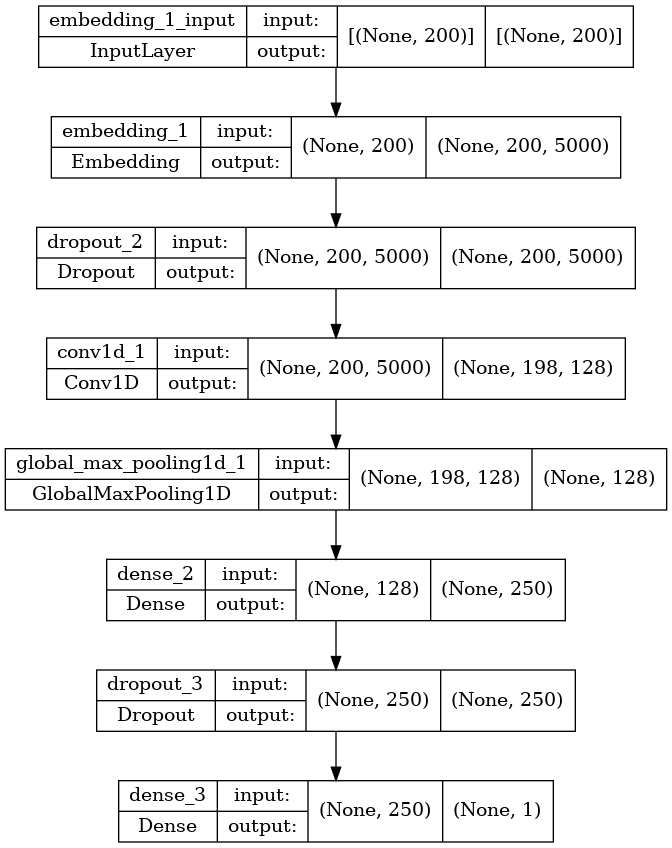

In [33]:
plot_model(model_one_hot, show_shapes=True)

### Train the model

In [34]:
history = model_one_hot.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.1)

Epoch 1/4
704/704 [==============================] - 363s 515ms/step - loss: 0.4461 - accuracy: 0.7704 - val_loss: 0.3412 - val_accuracy: 0.8524
Epoch 2/4
704/704 [==============================] - 363s 515ms/step - loss: 0.2458 - accuracy: 0.8991 - val_loss: 0.2680 - val_accuracy: 0.8828
Epoch 3/4
704/704 [==============================] - 368s 523ms/step - loss: 0.1382 - accuracy: 0.9494 - val_loss: 0.2744 - val_accuracy: 0.8892
Epoch 4/4
704/704 [==============================] - 363s 515ms/step - loss: 0.0763 - accuracy: 0.9733 - val_loss: 0.2875 - val_accuracy: 0.8896


In [35]:
one_hot = model_one_hot.get_weights()[0]
one_hot.shape

(5000, 5000)

In [36]:
one_hot[0]

array([1., 0., 0., ..., 0., 0., 0.], dtype=float32)

## Evaluate the results

In [37]:
loss, accuracy = model_one_hot.evaluate(x_test, y_test, verbose=False)
print(f"Testing Accuracy: {accuracy*100:.2f}%")

Testing Accuracy: 88.89%
